### Name: Kathryn Zhou
### Net ID: yz6956

I first loaded the movie rating dataset by using np.genfromtxt(). For data cleaning, I didn't choose to do it at the beginning for the entire dataset, because situations vary for each question and I want to keep as much data as possible. 

Dimension reduction is necessary for the responses to the questions of “sensation seeking”, "personality" and “movie experience”. The way that I handled dimension reduction is by doing PCA (Principal component analysis).

Firstly, I got the corresponding columns for each characteristic and removed the nan values for these three arrays.
Secondly, to avoid having highly skewed data, I transform the data by using z-scoring.
After completing the regular steps of PCA, I used Kaiser criterion (Keep all factors with an eigenvalue > 1) to determine how many factors I should keep for each characteristic.

FIGURE

In [290]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [291]:
data = np.genfromtxt('movieReplicationSet.csv',delimiter=',',skip_header=1) 

In [292]:
# PCA
s = data[:,range(401,420)] # sensation seeking
p = data[:,range(421,464)] # personality
e = data[:,range(465,474)] # movie experience

s = s[~np.isnan(s).any(axis=1), :]
p = p[~np.isnan(p).any(axis=1), :]
e = e[~np.isnan(e).any(axis=1), :]

# 1. Z-score the data:
zs = stats.zscore(s)
zp = stats.zscore(p)
ze = stats.zscore(e)

# 2. Initialize PCA object and fit to our data:
pcas = PCA().fit(zs)
pcap = PCA().fit(zp)
pcae = PCA().fit(ze)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
seigVals = pcas.explained_variance_
peigVals = pcap.explained_variance_
eeigVals = pcae.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. 
sloadings = pcas.components_
ploadings = pcap.components_
eloadings = pcae.components_

# 3c. Rotated Data
srotatedData = pcas.fit_transform(zs)
protatedData = pcap.fit_transform(zp)
erotatedData = pcae.fit_transform(ze)

# 4. For the purposes of this, you can think of eigenvalues in terms of (co)variance explained:
scovarExplained = seigVals/sum(seigVals)*100
pcovarExplained = peigVals/sum(peigVals)*100
ecovarExplained = eeigVals/sum(eeigVals)*100

# 1) Kaiser criterion: Keep all factors with an eigenvalue > 1
threshold = 1
print('Number of sensation seeking factors:', np.count_nonzero(seigVals > threshold))
print('Number of personality factors:', np.count_nonzero(peigVals > threshold))
print('Number of movie experience factors:', np.count_nonzero(eeigVals > threshold))

Number of sensation seeking factors: 6
Number of personality factors: 8
Number of movie experience factors: 2


### Question 1: What is the relationship between sensation seeking and movie experience?

Firstly, I got the corresponding columns for "sensation seeking" and "movie experience", and formed two arrays correspondingly. 
Secondly, I cleaned the data by removing the rows that contain nan values. Also, to avoid having highly skewed data, I transform the data by using z-scoring. 

From the PCA that I done seperately for "sensation seeking", "personality" and "movie experience", I've already chosen the number of factors to keep: 6 for sensation seeking and 2 for movie experience.

FIGURE

To determine the relationship, I computed the correlation of the mean of ses and see, and ploted the graph. The correlation coefficient is 0 and the graph always shows that there isn't significiant relationship between. Therefore, I choose to conclude that there is no relationship between sensation seeking and movie experience.

FIGURE

[[ 1.         -0.04959026]
 [-0.04959026  1.        ]]


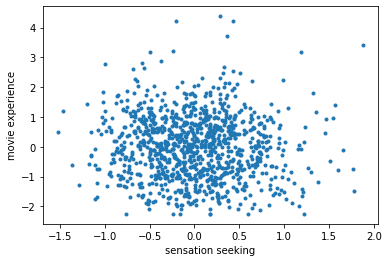

In [293]:
# PCA
se = np.hstack((data[:,range(401,420)],data[:,range(465,474)]))
se = se[~np.isnan(se).any(axis=1), :]


# Z-score the data:
ses = stats.zscore(se[:,:19])
see = stats.zscore(se[:,-9:])

# Initialize PCA object and fit to our data:
sespca = PCA().fit(ses)
seepca = PCA().fit(see)

sesrotatedData = sespca.fit_transform(ses)
seerotatedData = seepca.fit_transform(see)

ses_major = sesrotatedData[:,:6]
see_major = seerotatedData[:,:2]

ses_mean = np.mean(ses_major,axis=1)
see_mean = np.mean(see_major,axis=1)

c1 = np.corrcoef(ses_mean,see_mean)
print(c1)

plt.plot(ses_mean,see_mean,'o',markersize=3)
plt.xlabel("sensation seeking")
plt.ylabel("movie experience")
plt.show()

### Question 2: Is there evidence of personality types based on the data of these research participants? If so, characterize these types both quantitatively and narratively.

Firstly, I need to reduce dimension for personality. I've done it at the beginning, and chose to keep 8 factors based on Kaiser criterion. 

FIGURE

Secondly, I used the kMeans method to determine the optimal number of clusters of personality, which means the number of personality types. I plotted the Silhouette score for each number of clusters and plotted another graph to make the change of the scores clearer. Finally, I chose the optimal number of clusters should be 2 based on the graph.

FIGURE

In [294]:
# PCA
p = data[:,range(421,464)] # personality
p = p[~np.isnan(p).any(axis=1), :]
zp = stats.zscore(p)
pcap = PCA().fit(zp)
protatedData = pcap.fit_transform(zp)
x = protatedData[:,:8]

In [295]:
p = data[:,range(421,464)] # personality
p = p[~np.isnan(p).any(axis=1), :]
zp = stats.zscore(p)
pcap = PCA().fit(zp)

peigVals = pcap.explained_variance_

ploadings = pcap.components_

protatedData = pcap.fit_transform(zp)

pcovarExplained = peigVals/sum(peigVals)*100

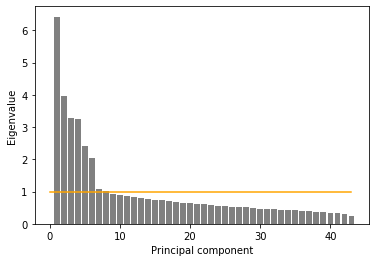

In [286]:
numClasses = 43
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, peigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

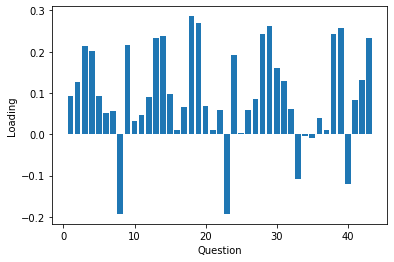

Index(['Tends to find fault with others', 'Does a thorough job',
       'Is depressed/Blue', 'Is original/comes up with new ideas',
       'Is reserved', 'Is helpful and unselfish with others',
       'Can be somewhat careless', 'Is relaxed/handles stress well',
       'Is curious about many different things', 'Is full of energy',
       'Starts quarrels with others', 'Is a reliable worker', 'Can be tense',
       'Is ingenious/a deep thinker', 'Generates a lot of Enthusiasm',
       'Has a forgiving nature', 'Tends to be disorganized', 'Worries a lot',
       'Has an active imagination', 'Tends to be quiet',
       'Is generally trusting', 'Tends to be lazy',
       'Is emotionally stable/not easily upset', 'is inventive',
       'Has an assertive personality', 'Can be cold and aloof',
       'Perseveres until the task is finished', 'Can be moody',
       'Values artistic/aesthetic experiences', 'Is sometimes shy/inhibited',
       'Is considerate and kind to almost everyone', 'Does t

In [287]:
whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,ploadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

datawithtitle = pd.read_csv('movieReplicationSet.csv')
questions = datawithtitle.columns[421:464]
print(questions) # Display questions

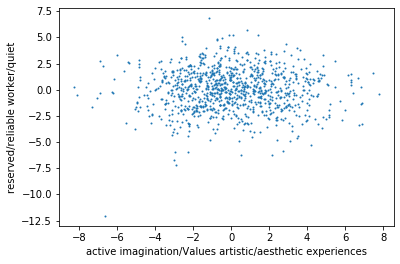

In [296]:
# Rotated Data - simply the transformed data:
origDataNewCoordinates = pcap.fit_transform(zp)*-1


plt.plot(origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],'o',markersize=1)
plt.xlabel('active imagination/Values artistic/aesthetic experiences')
plt.ylabel('reserved/reliable worker/quiet')
plt.show()

In [297]:
# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

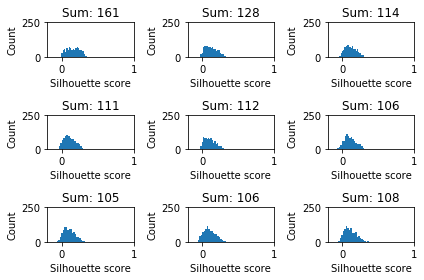

In [298]:
# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

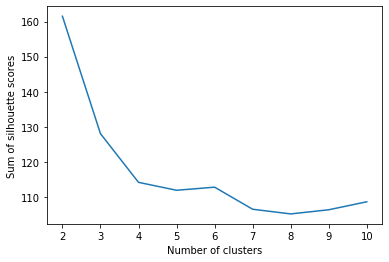

In [299]:
# Plot this to make it clearer what is going on
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

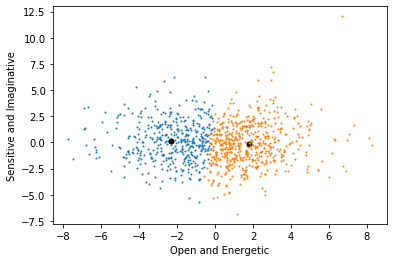

In [300]:
# Recompute kMeans:
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Open and Energetic')
    plt.ylabel('Sensitive and Imaginative')
    

### Question 3: Are movies that are more popular rated higher than movies that are less popular?

In [156]:
N = []
for i in range(400):
    M = data[:,i]
    M = M[np.isfinite(M)] # only keep the finite elements (not infinity or NaN)
    N.append(M)
N = np.array(N)

allmean = np.zeros([400,2])
for i in range(400):
    mean = np.mean(N[i])
    allmean[i][0] = mean
    allmean[i][1] = len(N[i])
   
sortedmean = allmean[allmean[:,0].argsort()]

c3 = np.corrcoef(allmean[:,0],allmean[:,1]) # 0.69916135
print(c3)

[[1.         0.69916135]
 [0.69916135 1.        ]]


In [157]:
count = []
ratings = []
for i in range(400):
    M = data[:,i]
    M = M[np.isfinite(M)] # only keep the finite elements (not infinity or NaN)
    count.append(len(M))
    ratings.append(np.mean(M))

count_median = np.median(count)
count = np.array(count)
ratings = np.array(ratings)

M_3 = np.vstack((count,ratings))
M_3 = M_3.T
print(M_3.shape)

popular = []
un = []
total_popularity = total_un = count_popularity = count_un = 0
for i in range(len(M_3)):
    if (M_3[i][0] > count_median):
        total_popularity += M_3[i][1]
        count_popularity += 1
        popular.append(M_3[i][1])
    elif (M_3[i][0] < count_median):
        total_un += M_3[i][1]
        count_un += 1
        un.append(M_3[i][1])

mean_popularity = total_popularity/count_popularity
mean_un = total_un/count_un

print("Q3")
print("Popular movie rating:", mean_popularity)
print("Unpopular movie rating:", mean_un)

t3,p3 = stats.ttest_ind(popular,un)
print("t:",t3)
print("p:",p3)

(400, 2)
Q3
Popular movie rating: 2.8683159282110724
Unpopular movie rating: 2.4009228451306637
t: 17.756049269873696
p: 2.2696530276566144e-52


### Question 4: Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

Firstly, I combined the column of the ratings of "Shrek (2001)" and the column 475 which shows the Gender identity (1 = female, 2 = male, 3 = self-described) into one array. 

By using a for loop, I went through every row of the array. If the rating is not a nan value and the gender identity is 1, I will add that into the matrix for female ratings. The same for the male ratings when the gender identity is 2. 

Then, I computed the mean of female ratings and male ratings respectively by dividing the total female/male ratings by the number of female/male ratings.

Finally, I used the independent t-test as the hypothesis testing method. The null hypothesis is there is no statistical significance exists between male viewers' ratings and female viewers' ratings. 

In my project, I take the conventional choices of alpha 0.05. The p-value is 0.271, greater than 0.05, so I chose not to reject the null hypothesis, and stated that there is no statistical significance exists between male viewers' ratings and female viewers' ratings. 

In [181]:
M_shrek = data[:,87] #Shrek (2001)

M_4 = data[:,[87,474]]
total_female = total_male = count_female = count_male = 0
M_female = []
M_male = []

for i in range(len(M_4[:,0])):
    if (M_4[i][1] == 1 and np.isnan(M_4[i][0])==False):
        total_female += M_4[i][0]
        M_female.append(M4[i][0])
        count_female += 1
    if (M_4[i][1] == 2 and np.isnan(M_4[i][0])==False):
        total_male += M_4[i][0]
        M_male.append(M4[i][0])
        count_male += 1

mean_female = total_female/count_female
mean_male = total_male/count_male

# number of two samples are not equal
# can I assume the data has normal distribution to perform t-test?
print("Q4")
print("Female rating: ", mean_female)
print("Male rating: ", mean_male)


t4,p4 = stats.ttest_ind(M_female,M_male)
print("p:",p4)

Q4
Female rating:  3.155450874831763
Male rating:  3.08298755186722
p: 0.27087511813734183


In [197]:
df = pd.read_csv('movieReplicationSet.csv')
df_cleaned = df.fillna(df.median())
df_np = pd.DataFrame(df_cleaned).to_numpy()

M4 = df_np[:,[87,474]]

total_female = total_male = count_female = count_male = 0
Mfemale = []
Mmale = []

for i in range(len(M4[:,0])):
    if (M4[i][1] == 1):
        total_female += M4[i][0]
        Mfemale.append(M4[i][0])
        count_female += 1
    if (M4[i][1] == 2):
        total_male += M4[i][0]
        Mmale.append(M4[i][0])
        count_male += 1

mean_female = total_female/count_female
mean_male = total_male/count_male

print("Q4")
print("Female rating:", mean_female)
print("Male rating:", mean_male)

t4,p4 = stats.ttest_ind(Mfemale,Mmale)
print("p:",p4)

Q4
Female rating: 3.17870036101083
Male rating: 3.1134615384615385
p: 0.28542529494330815


### Question 5: Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

Firstly, I combined the column of the ratings of "The Lion King (1994)" and the column 476: Only child (1 = yes, 0 = no, -1 = no response) into one array.

By using a for loop, I went through every row of the array. If the rating is not a nan value and the element in the column "only child" is 1, I will add that into the matrix for only child ratings. The same for the siblings ratings when the the element in the column "only child" is 0.

Then, I computed the mean of only child ratings and siblings ratings respectively by dividing the total only child/siblings ratings by the number of only child/siblings ratings.

Finally, I used the independent t-test as the hypothesis testing method. The null hypothesis is there is no statistical significance exists between only child ratings and siblings ratings.

The p-value is 0.0403, smaller than 0.05, so I chose to reject the null hypothesis, and stated that there is statistical significance between ratings of only child and ratings of siblings. And since the mean of ratings of only child is bigger than the one of the siblings, I chose to state that people who are only children enjoy ‘The Lion King (1994)’ less than people with siblings.

In [180]:
M_lion = data[:,220] # The Lion King (1994)

M_5 = data[:,[220,475]]
total_only = total_sib = count_only = count_sib = 0
M_only = []
M_sib = []

for i in range(len(M_5[:,0])):
    if (M_5[i][1] == 1 and np.isnan(M_5[i][0])==False):
        total_only += M_5[i][0]
        M_only.append(M_5[i][0])
        count_only += 1
    if (M_5[i][1] == 0 and np.isnan(M_5[i][0])==False):
        total_sib += M_5[i][0]
        M_sib.append(M_5[i][0])
        count_sib += 1
        
mean_only = total_only/count_only
mean_sib = total_sib/count_sib

print("Q5")
print("Only child rating:", mean_only)
print("Sibilings rating:", mean_sib)

t5,p5 = stats.ttest_ind(M_only,M_sib)
print("p:",p5)

Q5
Only child rating: 3.347682119205298
Sibilings rating: 3.481958762886598
p: 0.04026705526268264


### Question 6: Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

Firstly, I combined the column of the ratings of "The Wolf of Wall Street (2013)" and the column 477: Social viewing preference – “movies are best enjoyed alone” (1 = y, 0 = n, -1 = nr) into one array.

By using a for loop, I went through every row of the array. If the rating is not a nan value and the social viewing preference is 1, I will add that into the matrix for watching-alone ratings. The same for the watching-socially ratings when the social viewing preference is -1.

Then, I computed the mean of watching-alone ratings and watching-socially ratings respectively by dividing the total watching-alone/-socially ratings by the number of watching-alone/-socially ratings.

Finally, I used the independent t-test as the hypothesis testing method. The null hypothesis is there is no statistical significance exists between ratings of people who watch alone and people who watch socially.

The p-value is 0.117, greater than 0.05, so I chose not to reject the null hypothesis, and stated that there is no statistical significance exists between ratings of people who watch alone and people who watch socially.

In [182]:
M_wolf = data[:,357] # The Wolf of Wall Street (2013)

M_6 = data[:,[357,476]]
total_alone = total_soc = count_alone = count_soc = 0
M_alone = []
M_soc = []

for i in range(len(M_6[:,0])):
    if (M_6[i][1] == 1 and np.isnan(M_6[i][0])==False):
        total_alone += M_6[i][0]
        M_alone.append(M_6[i][0])
        count_alone += 1
    if (M_6[i][1] == 0 and np.isnan(M_6[i][0])==False):
        total_soc += M_6[i][0]
        M_soc.append(M_6[i][0])
        count_soc += 1

mean_alone = total_alone/count_alone
mean_soc = total_soc/count_soc

print("Q6")
print("Watch alone:", mean_alone)
print("Watch socially:", mean_soc)

t6,p6 = stats.ttest_ind(M_alone,M_soc)
print("t:",t6)
print("p:",p6)

Q6
Watch alone: 3.143765903307888
Watch socially: 3.033333333333333
t: 1.567873874504994
p: 0.11738913665664574


### Question 7: There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers?

In [211]:
# Star Wars
data[:,21] # Star Wars: Episode IV - A New Hope (1977)
data[:,273] # Star Wars: Episode 1 - The Phantom Menace (1999)
data[:,93] # Star Wars: Episode II - Attack of the Clones (2002)
data[:,174] # Star Wars: Episode V - The Empire Strikes Back (1980)
data[:,342] # Star Wars: Episode VI - The Return of the Jedi (1983)
data[:,336] # Star Wars: Episode VII - The Force Awakens (2015)

# Star Wars
M_71 = data[:,[21,273,93,174,342,336]]
M_71 = M_71[~np.isnan(M_71).any(axis=1), :]

f71,p71 = stats.f_oneway(M_71[:,0],M_71[:,1],M_71[:,2],M_71[:,3],M_71[:,4],M_71[:,5])
print("f:",f71)
print("p:",p71)

f: 39.029939613074056
p: 2.399595163532992e-38


In [212]:
# Harry Potter
data[:,394] # Harry Potter and the Chamber of Secrets (2002)
data[:,230] # Harry Potter and the Sorcerer's Stone (2001)
data[:,258] # Harry Potter and the Deathly Hallows: Part 2 (2011)
data[:,387] # Harry Potter and the Goblet of Fire (2005)

# Harry Potter
M_72 = data[:,[394,230,258,387]]
M_72 = M_72[~np.isnan(M_72).any(axis=1), :]

f72,p72 = stats.f_oneway(M_72[:,0],M_72[:,1],M_72[:,2],M_72[:,3])
print("f:",f72)
print("p:",p72)

f: 1.4456904473285563
p: 0.2275340290918136


In [213]:
# The Matrix
data[:,306] # The Matrix (1999)
data[:,35] # The Matrix Revolutions (2003)
data[:,172] # The Matrix Reloaded (2003)

# The Matrix
M_73 = data[:,[306,35,172]]
M_73 = M_73[~np.isnan(M_73).any(axis=1), :]

f73,p73 = stats.f_oneway(M_73[:,0],M_73[:,1],M_73[:,2])
print("f:",f73)
print("p:",p73)

f: 18.59281511303809
p: 1.2957225925356723e-08


In [214]:
# Indiana Jones
data[:,32] # Indiana Jones and the Temple of Doom (1984)
data[:,4] # Indiana Jones and the Last Crusade (1989)
data[:,142] # Indiana Jones and the Kingdom of the Crystal Skull (2008)

# Indiana Jones
M_74 = data[:,[32,4,142]]
M_74 = M_74[~np.isnan(M_74).any(axis=1), :]

f74,p74 = stats.f_oneway(M_74[:,0],M_74[:,1],M_74[:,2])
print("f:",f74)
print("p:",p74)

f: 16.40534411724678
p: 9.744274397244495e-08


In [215]:
# Jurassic Park
data[:,370] # Jurassic Park (1993)
data[:,37] # The Lost World: Jurassic Park (1997)
data[:,47] # Jurassic Park III (2001)

# Jurassic Park
M_75 = data[:,[370,37,47]]
M_75 = M_75[~np.isnan(M_75).any(axis=1), :]

f75,p75 = stats.f_oneway(M_75[:,0],M_75[:,1],M_75[:,2])
print("f:",f75)
print("p:",p75)

f: 22.163615231952214
p: 3.542127514286409e-10


In [216]:
# Pirates of the Caribbean
data[:,351] # Pirates of the Caribbean: The Curse of the Black Pearl (2003)
data[:,75] # Pirates of the Caribbean: Dead Man's Chest (2006)
data[:,204] # Pirates of the Caribbean: At World's End (2007)

# Pirates of the Caribbean
M_76 = data[:,[351,75,204]]
M_76 = M_76[~np.isnan(M_76).any(axis=1), :]

f76,p76 = stats.f_oneway(M_76[:,0],M_76[:,1],M_76[:,2])
print("f:",f76)
print("p:",p76)

f: 3.4465950041304327
p: 0.03207932803269902


In [217]:
# Toy Story
data[:,276] # Toy Story (1995)
data[:,157] # Toy Story 2 (1999)
data[:,171] # Toy Story 3 (2010)

# Toy Story
M_77 = data[:,[276,157,171]]
M_77 = M_77[~np.isnan(M_77).any(axis=1), :]

f77,p77 = stats.f_oneway(M_77[:,0],M_77[:,1],M_77[:,2])
print("f:",f77)
print("p:",p77)

f: 7.588144542578829
p: 0.0005193828629536134


In [218]:
# Batman

data[:,181] # Batman (1989)
data[:,46] # Batman & Robin (1997)

# Batman
M_78 = data[:,[181,46]]
M_78 = M_78[~np.isnan(M_78).any(axis=1), :]

f78,p78 = stats.f_oneway(M_78[:,0],M_78[:,1])
print("f:",f78)
print("p:",p78)

f: 28.083419490364403
p: 1.7403794623835232e-07


### Question 8: Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [280]:
df = pd.read_csv('movieReplicationSet.csv')
df_cleaned = df.fillna(df.median())
df_np = pd.DataFrame(df_cleaned).to_numpy()

x_8 = df_np[:,420:464]
y_8 = df_np[:,320]

print(x_8.shape)
print(y_8.shape)

x_8_train,x_8_test,y_8_train,y_8_test = train_test_split(x_8,y_8,test_size=0.2)

regressor = LinearRegression()
regressor.fit(x_8_train,y_8_train)

y_8_prediction = regressor.predict(x_8_test)
print('R^2:',metrics.r2_score(y_8_test,y_8_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_8_test,y_8_prediction)))

(1097, 44)
(1097,)
R^2: -0.0675918925025254
RMSE: 0.3846881856003435


In [274]:
df = pd.read_csv('movieReplicationSet.csv')
df_cleaned = df.fillna(df.median())
df_np = pd.DataFrame(df_cleaned).to_numpy()

x_8 = df_np[:,420:464]

for i in range(400):
    y_8 = df_np[:,i]
    x_8_train,x_8_test,y_8_train,y_8_test = train_test_split(x_8,y_8,test_size=0.2,random_state=10)

    regressor = LinearRegression()
    regressor.fit(x_8_train,y_8_train)

    y_8_prediction = regressor.predict(x_8_test)
    print('R^2:',metrics.r2_score(y_8_test,y_8_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_8_test,y_8_prediction)))

R^2: -0.04750118956806593
RMSE: 0.3374900330759505
R^2: -0.10362255024070444
RMSE: 0.2732708163922752
R^2: -0.012699513916869076
RMSE: 0.6583191697606974
R^2: -0.04369342838101775
RMSE: 0.6051254583964771
R^2: 0.007719807306725057
RMSE: 0.6234836934392531
R^2: -0.02840575433298209
RMSE: 0.3832524974787035
R^2: -0.06521101999198442
RMSE: 0.390508440494713
R^2: 0.03036807750432724
RMSE: 0.5630395583325789
R^2: -0.06721538827060125
RMSE: 0.3244051213142089
R^2: -0.06026936156291729
RMSE: 0.750457160243788
R^2: -0.0843020019984062
RMSE: 0.6288667520666872
R^2: 0.0008615270732031943
RMSE: 0.4323429607348565
R^2: -0.09898149483325769
RMSE: 0.5786415611208982
R^2: -0.04891739270184248
RMSE: 0.35953740992374617
R^2: 0.002023358437407974
RMSE: 0.8908756824717687
R^2: -0.07215371583424468
RMSE: 0.30220340052411643
R^2: -0.022670173811775385
RMSE: 0.5963129890334847
R^2: -0.055203910223937
RMSE: 0.6033075035387936
R^2: -0.09020061604437934
RMSE: 0.6490923410500519
R^2: -0.06874826018398439
RMSE: 

R^2: 0.007154454261161902
RMSE: 0.357603338013196
R^2: -0.040214857547623106
RMSE: 0.25831650931948535
R^2: 3.3487270280296855e-05
RMSE: 0.5249666127380914
R^2: -0.17652325742605535
RMSE: 0.41264244441270437
R^2: -0.023818750530429922
RMSE: 0.6421048044425415
R^2: -0.0848876715397302
RMSE: 0.7830438467749665
R^2: -0.0962802132334275
RMSE: 0.2931768618033323
R^2: 0.012122979260194677
RMSE: 0.8394241362576632
R^2: -0.21534524603752314
RMSE: 0.3193328868874931
R^2: -0.11041017777848672
RMSE: 0.7610047527994998
R^2: -0.07414125381374714
RMSE: 0.42327124840428465
R^2: -0.06045058888113486
RMSE: 0.6739861830410738
R^2: -0.035161551748621234
RMSE: 0.8264984488656083
R^2: -0.30383631343413753
RMSE: 0.21718605083698353
R^2: -0.06620262950066014
RMSE: 0.36503876466429436
R^2: -0.1232387122619143
RMSE: 0.3407357883070535
R^2: -0.09704718635003484
RMSE: 0.3031320421679401
R^2: -0.12728609984506978
RMSE: 0.22507332446930678
R^2: -0.0656825561970098
RMSE: 0.4843369403330033
R^2: -0.08626640128889651

R^2: -0.014071155381280676
RMSE: 0.5100943066446708
R^2: -0.09233917598515706
RMSE: 0.6082498098142438
R^2: -0.11139468541532382
RMSE: 0.6397914442961042
R^2: -0.17121587288915552
RMSE: 0.19529887133736934
R^2: -0.10159730424689206
RMSE: 0.7189635615421949
R^2: -0.12796124401812503
RMSE: 0.23704075038161979
R^2: -0.08488366900768063
RMSE: 0.23013241287919697
R^2: -0.017097509385443077
RMSE: 0.42195954044631767
R^2: -0.07804941317419178
RMSE: 0.25359392640203293
R^2: -0.05669865428723053
RMSE: 0.32476664218682627
R^2: -0.38296896255868984
RMSE: 0.19420951403705672
R^2: -0.021560455005350754
RMSE: 0.4586089852179252
R^2: -0.01433569189541628
RMSE: 0.6880599639914251
R^2: -0.03930917778631149
RMSE: 0.4121595741648797
R^2: -0.2569813083079042
RMSE: 0.25290178397045737
R^2: -0.09733426728184824
RMSE: 0.28249978500804024
R^2: -0.14642704256301786
RMSE: 0.2363695273149422
R^2: -0.028377457201581135
RMSE: 0.6273448335595136
R^2: -0.0361621303320514
RMSE: 0.7598707047638983
R^2: -0.142320021142

### Question 9: Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [204]:
x9 = df_np[:,474:477]
y9 = df_np[:,0]

In [205]:
model9 = LinearRegression().fit(x9,y9)
rSqr9 = model9.score(x9,y9)
b09, b19 = model9.intercept_, model9.coef_
yHat9 = b19[0]*data[:,0] + b19[1]*data[:,1] + b19[2]*data[:,2] + b09
print("coefficient:",b19)
print("intercept:",b09)

coefficient: [-0.04368926 -0.00088393 -0.00930794]
intercept: 2.5354505093472572


Text(0.5, 1.0, 'R^2 = 0.004')

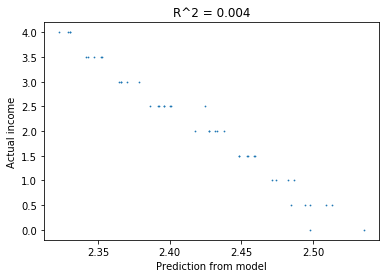

In [206]:
plt.plot(yHat9,y9,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual income')  
plt.title('R^2 = {:.3f}'.format(rSqr9))

In [207]:
x_9 = df_np[:,474:477]
y_9 = df_np[:,:400]

x_9_train,x_9_test,y_9_train,y_9_test = train_test_split(x_9,y_9,test_size=0.5)

regressor = LinearRegression()
regressor.fit(x_9_train,y_9_train)

y_9_prediction = regressor.predict(x_9_test)
print('R^2:',metrics.r2_score(y_9_test,y_9_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_9_test,y_9_prediction)))

R^2: -0.004070506418544883
RMSE: 0.5145205888261973


### Question 10: Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401- 477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [259]:
x_10 = df_np[:,401:477]
y_10 = df_np[:,:400]

x_10_train,x_10_test,y_10_train,y_10_test = train_test_split(x_10,y_10,test_size=0.5)

regressor = LinearRegression()
regressor.fit(x_10_train,y_10_train)

y_10_prediction = regressor.predict(x_10_test)
print('R^2:',metrics.r2_score(y_10_test,y_10_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_10_test,y_10_prediction)))

R^2: -0.12049634996833632
RMSE: 0.5617390318996187


## Extra credit: Tell us something interesting about this dataset that is not trivial and not already part of an answer (implied or explicitly) to these enumerated questions.

Can we find certain movies that different types of viewers prefer based on the data that represents "senesation seeking", "personality", "movie experience", Gender identity, Only Child or not, Social viewing preference?